Importing Necessary Libraries

                                                                   Suyash Tambe
                                                                   22070126117
                                                                    AIML B2
                                                                USL LAB Practical

<span style="font-size: 105px; color: #90EE90;">Clustering</span>


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

Reading the Dataset

In [3]:
df=pd.read_csv(r"C:\Users\Suyash Tambe\Desktop\Unspervised learning\Mall_Customers.csv")

In [4]:
print("Shape of the dataset :", df.shape)

Shape of the dataset : (200, 5)


In [5]:
df.sample(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
140,141,Female,57,75,5
58,59,Female,27,46,51
137,138,Male,32,73,73


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.describe(include = 'object')

,Gender
count,200
unique,2
top,Female
freq,112


In [8]:
df.isnull().any().any()

False

In [9]:
# Importing the warnings library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Selecting specific features from the DataFrame for clustering analysis
# Here, we choose 'Spending Score (1-100)' and 'Annual Income (k$)' which are likely to be key indicators of customer behavior
x = df.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values

# Checking the shape of the array 'x' to verify the dimensions (number of entries and features) that will be used in clustering
print(x.shape)


(200, 2)


In [10]:
# lets also check the data, which we are going to use for the clustering analysis
x_df  = pd.DataFrame(x)
x_df.head()
# where o->Spending Score, and 1->Annual Income

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


In [11]:
# Define a mapping dictionary to convert categorical gender data into numerical format
# 'Male' is mapped to 0 and 'Female' is mapped to 1
gender_mapping = {'Male': 0, 'Female': 1}

# Apply the mapping to the 'Gender' column of the dataframe
# This replaces the string values 'Male' and 'Female' in the 'Gender' column with 0 and 1, respectively
df['Gender'] = df['Gender'].map(gender_mapping)


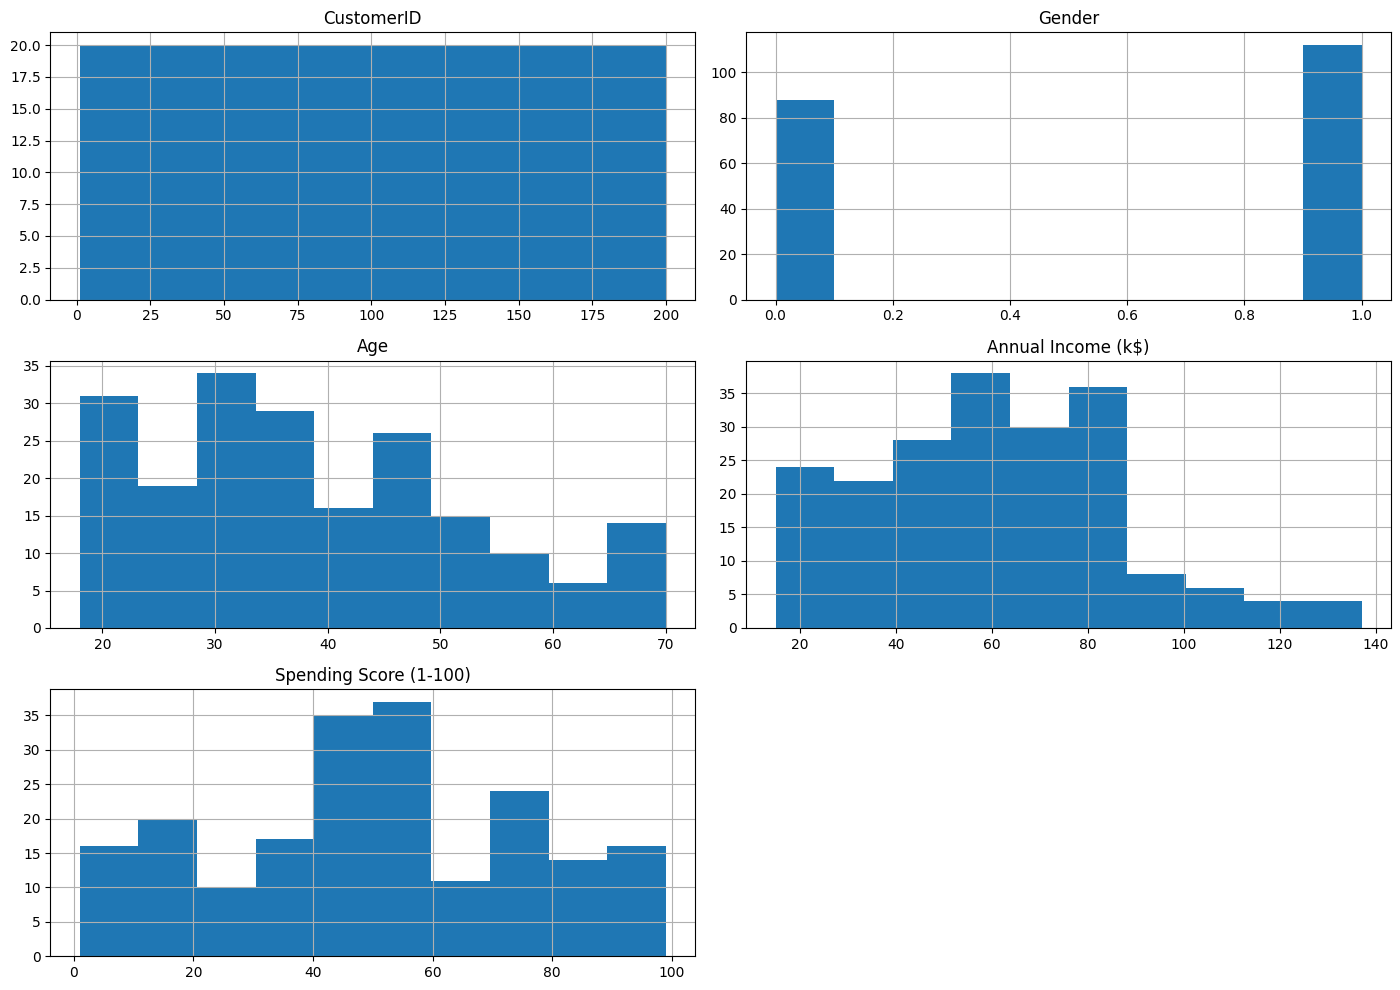

In [12]:
df.hist(figsize=(14, 10))
plt.tight_layout()
plt.show()

# Inferences

* The Gender distribution  indicate that the dataset includes a diverse customer base and that females are slightly more prevalent than males.


* Age seems to be distributed across a wide range, with certain age groups being more common, which may be indicative of the target demographics for the business.


* Annual Income shows that there are common income brackets where customers are grouped, which might suggest different market segments.


* The Spending Score indicates that while customers' scores vary widely, there is a significant number in the moderate spending category, which could be a key target for marketing strategies.

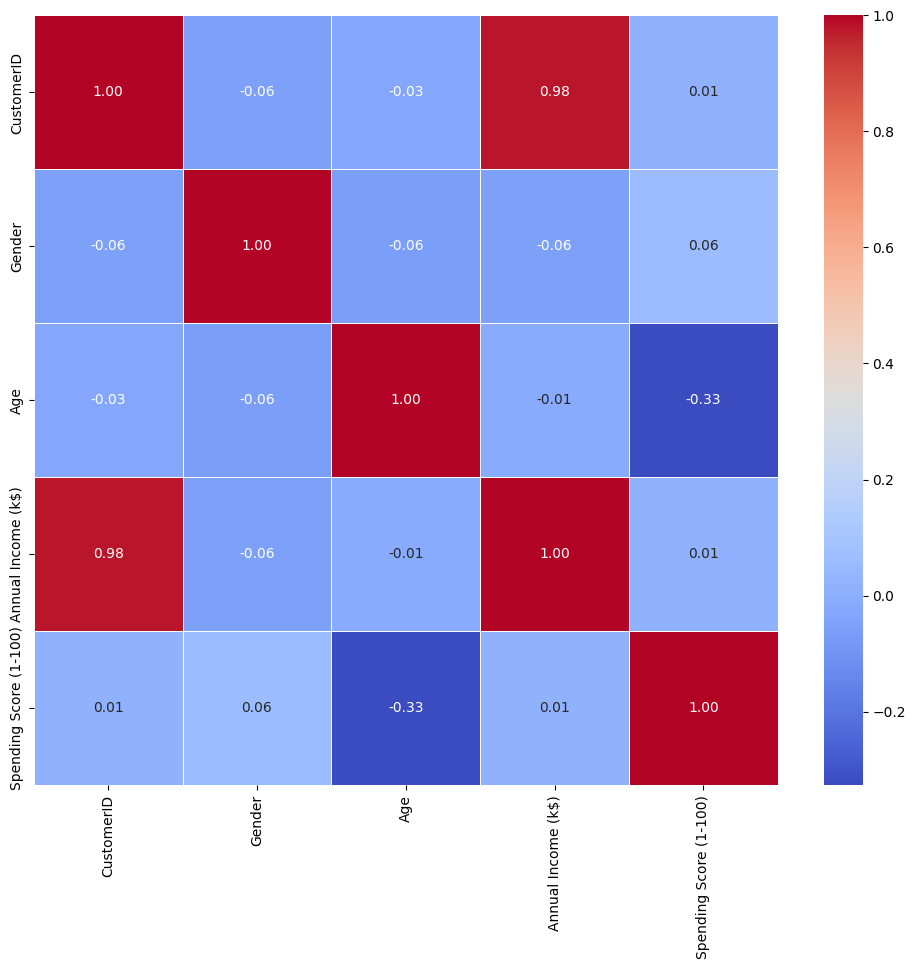

In [13]:
# Compute the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.show()

## Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

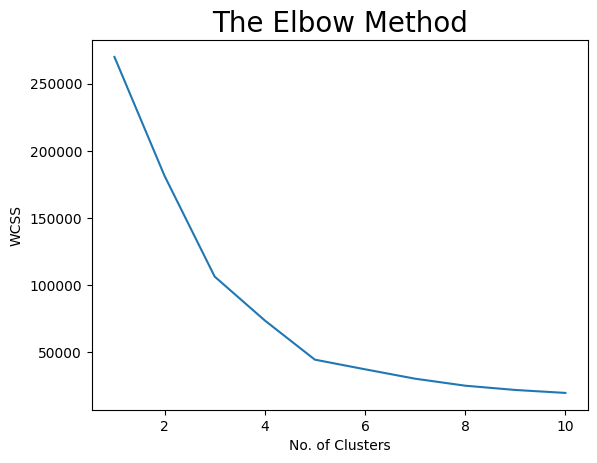

In [14]:
from sklearn.cluster import KMeans

# Initialize an empty list to store the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters
wcss = []

# Iterate over a range of cluster numbers from 1 to 10
for i in range(1, 11):
    # Create a KMeans object with the specified number of clusters
    # 'k-means++' is used as the initialization method, which improves the convergence speed
    # 'max_iter' specifies the maximum number of iterations for each initialization
    # 'n_init' specifies the number of times the k-means algorithm will be run with different centroid seeds
    # 'random_state' sets the seed for random number generation for reproducibility
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    
    # Fit the KMeans model to the data
    km.fit(x)
    
    # Append the inertia (WCSS) to the list
    wcss.append(km.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)  # Plotting number of clusters vs. WCSS
plt.title('The Elbow Method', fontsize=20)  # Title of the plot
plt.xlabel('No. of Clusters')  # X-axis label
plt.ylabel('WCSS')  # Y-axis label
plt.show()  # Display the plot


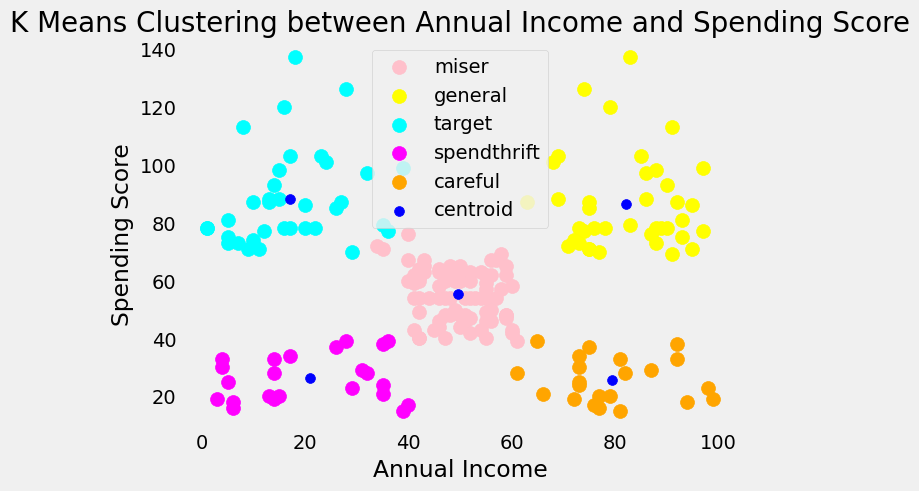

In [15]:
plt.style.use('fivethirtyeight')  # Set the plot style to 'fivethirtyeight'

# Create a KMeans object with 5 clusters
km = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Predict the cluster labels
y_means = km.fit_predict(x)

# Plot each cluster with different colors and labels
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='pink', label='miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='yellow', label='general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c='cyan', label='target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s=100, c='magenta', label='spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s=100, c='orange', label='careful')

# Plot the cluster centroids
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='blue', label='centroid')

# Set plot title, x-axis label, y-axis label, legend, and grid
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize=20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()

# Display the plot
plt.show()


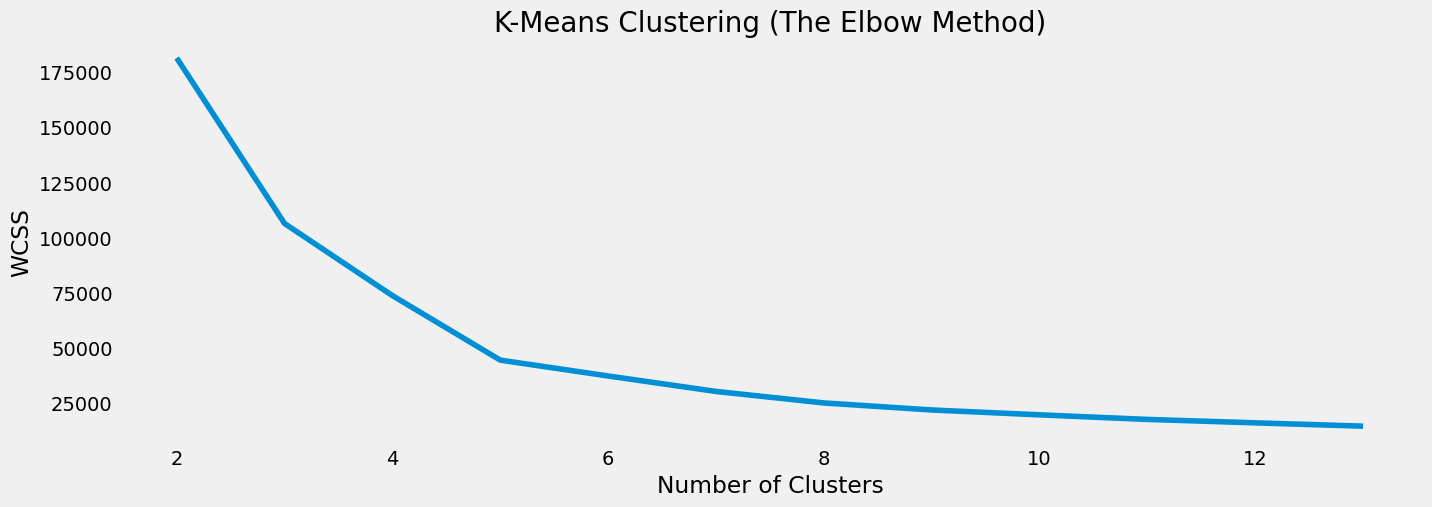

In [17]:
from sklearn.cluster import KMeans

# Initialize an empty list to store the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters
wcss = []

# Iterate over a range of cluster numbers from 1 to 10
for i in range(2, 14):
    # Create a KMeans object with the specified number of clusters and other parameters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    
    # Fit the KMeans model to the data
    kmeans.fit(x)
    
    # Append the inertia (WCSS) to the list
    wcss.append(kmeans.inertia_)

# Set the size of the plot
plt.rcParams['figure.figsize'] = (15, 5)

# Plot the Elbow Method graph
plt.plot(range(2, 14), wcss)  # Plotting number of clusters vs. WCSS
plt.title('K-Means Clustering (The Elbow Method)', fontsize=20)  # Title of the plot
plt.xlabel('Number of Clusters')  # X-axis label
plt.ylabel('WCSS')  # Y-axis label
plt.grid()  # Show grid lines
plt.show()  # Display the plot


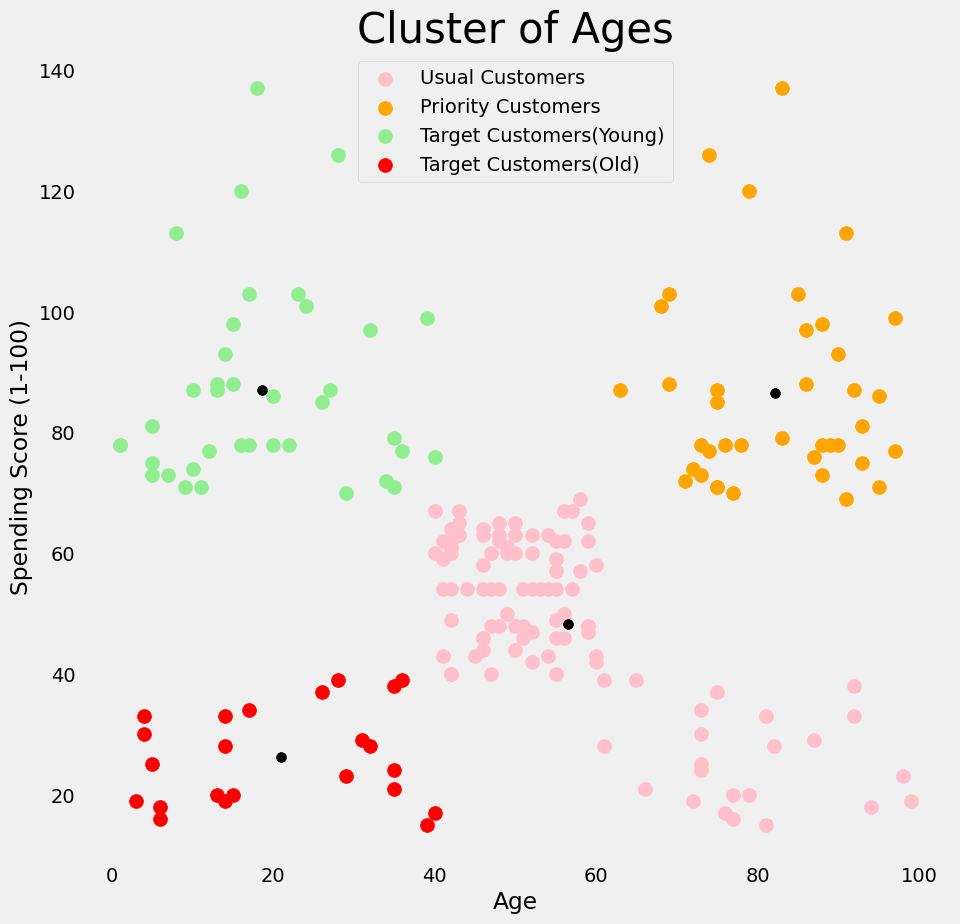

In [18]:
# Create a KMeans object with 4 clusters and other parameters
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Predict the cluster labels
ymeans = kmeans.fit_predict(x)

# Set the size of the plot
plt.rcParams['figure.figsize'] = (10, 10)

# Set the title of the plot
plt.title('Cluster of Ages', fontsize=30)

# Plot data points for each cluster with different colors and labels
plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s=100, c='pink', label='Usual Customers')
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s=100, c='orange', label='Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s=100, c='lightgreen', label='Target Customers (Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s=100, c='red', label='Target Customers (Old)')

# Plot the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=50, c='black')

# Set the plot style to 'fivethirtyeight'
plt.style.use('fivethirtyeight')

# Set the label for the x-axis
plt.xlabel('Age')

# Set the label for the y-axis
plt.ylabel('Spending Score (1-100)')

# Show legend
plt.legend()

# Show grid lines
plt.grid()

# Display the plot
plt.show()


In [19]:
# These columns will be used as the features for clustering
X = df.iloc[:, [3, 4]].values 

In [20]:
# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
# StandardScaler learns the mean and standard deviation of each feature from the data and then scales the data
# The fit_transform method fits the scaler to the data and then transforms the data
# This ensures that each feature has a mean of 0 and a standard deviation of 1, which is a common preprocessing step in machine learning
# The fit_transform method expects a 2D array-like object as input, so we pass the DataFrame 'df' directly
scaled_features = scaler.fit_transform(df)

In [21]:
# We start from 2 clusters because we need at least 2 clusters for clustering
# and end at 13 clusters. we can adjust this range based on your specific problem and requirements.
k_values = range(2, 14) 

In [22]:
# Initialize an empty list to store silhouette scores for different values of K
silhouette_scores = []

# The silhouette score is a metric that measures the quality of clusters
# It quantifies how similar an object is to its own cluster compared to other clusters
# A higher silhouette score indicates better separation between clusters and better cohesion within clusters

In [23]:
# Iterate over each value of K in the specified range
for k in k_values:
    # Create a KMeans clustering model with the current number of clusters (K)
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the KMeans model to the scaled features
    kmeans.fit(scaled_features)
    
    # Get the cluster labels for each data point
    cluster_labels = kmeans.labels_
    
    # Calculate the silhouette score for the current clustering
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    
    # Append the silhouette score to the list
    silhouette_scores.append(silhouette_avg)

    # Print the silhouette score for the current value of K
    print(f"Silhouette Score for K-means with {k} clusters:", silhouette_avg)


Silhouette Score for K-means with 2 clusters: 0.25418996301027574
Silhouette Score for K-means with 3 clusters: 0.2523864220334183
Silhouette Score for K-means with 4 clusters: 0.2399088992641933
Silhouette Score for K-means with 5 clusters: 0.28733914723855114
Silhouette Score for K-means with 6 clusters: 0.3033665012106212
Silhouette Score for K-means with 7 clusters: 0.33456543612592193
Silhouette Score for K-means with 8 clusters: 0.3732368878679529
Silhouette Score for K-means with 9 clusters: 0.3746368530941026
Silhouette Score for K-means with 10 clusters: 0.40668128063891773
Silhouette Score for K-means with 11 clusters: 0.4129551881418393
Silhouette Score for K-means with 12 clusters: 0.3915556796525733
Silhouette Score for K-means with 13 clusters: 0.36885450912728446


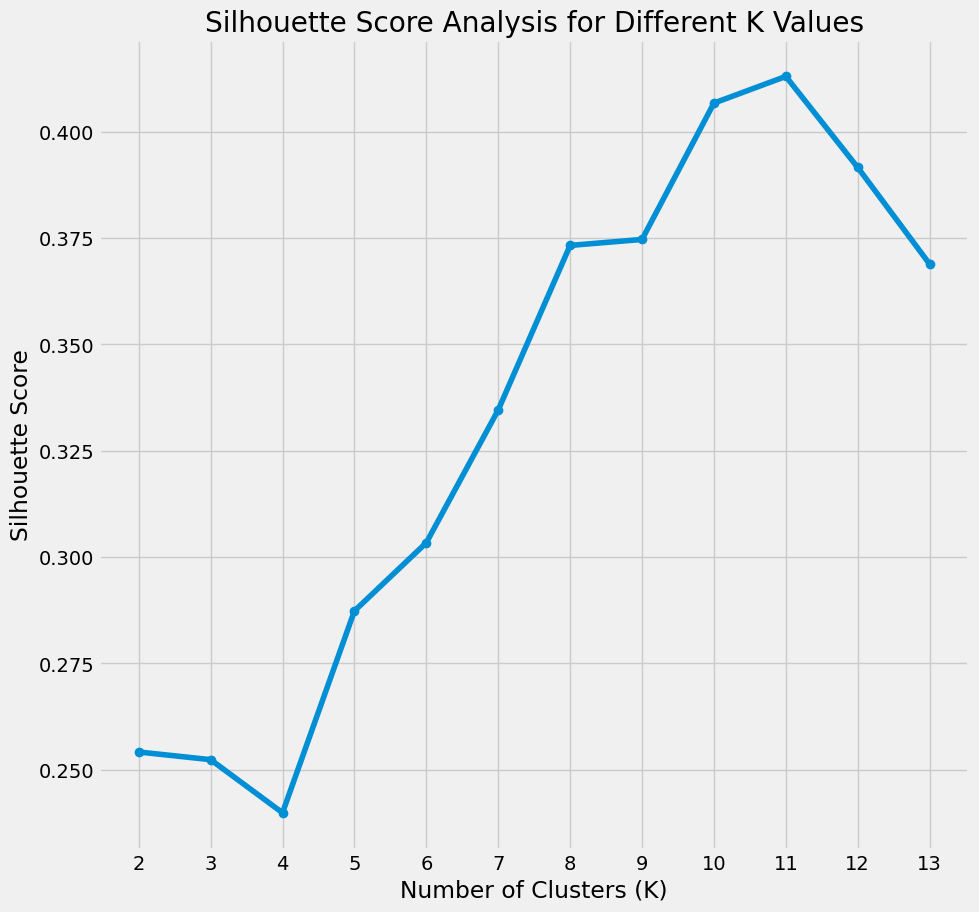

In [24]:
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score Analysis for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()

* As K increases to 5, there is a significant increase in the silhouette score, suggesting that the separation between clusters and the cohesion within clusters is improving.


* The silhouette score reaches its peak at K=11, indicating that 11 clusters provide the best-defined separation of the data into distinct groups according to the silhouette metric.


* Beyond K=11, the silhouette score decreases, suggesting that additional clusters beyond this point do not contribute to a better definition of separate groups and may instead be dividing data points that should remain in the same cluster.


* At K=12, the score takes a downturn, which could indicate that the additional clusters are not meaningful or that they may be forcing dissimilar data points into the same cluster.

In [25]:
optimal_k = k_values[np.argmax(silhouette_scores)]
print("Optimal number of clusters (K):", optimal_k)

Optimal number of clusters (K): 11


In [26]:
# Apply Agglomerative Hierarchical clustering
# Initialize AgglomerativeClustering model with the optimal number of clusters
agglomerative = AgglomerativeClustering(n_clusters=optimal_k)

# Fit the AgglomerativeClustering model to the scaled features
agglomerative.fit(scaled_features)

# Get the cluster labels for each data point
agg_cluster_labels = agglomerative.labels_

# Calculate the silhouette score for the Agglomerative Clustering
agg_silhouette_score = silhouette_score(scaled_features, agg_cluster_labels)

# Print the silhouette score for Agglomerative Clustering
print("Silhouette Score for Agglomerative Clustering:", agg_silhouette_score)


Silhouette Score for Agglomerative Clustering: 0.40752350395261205



**Observations-** 
1) Silhouette Score Trends: We investigated how the silhouette score varies with the number of clusters by charting the silhouette scores for various values of K.We observed that the silhouette score improves with K until it reaches its optimal k value, which in this example is 11, and then it declines with K owing to overfitting or a decline in cluster quality.


2) Optimal Number of Clusters: 11 clusters (K) were found to be the ideal number. A better fit for the dataset is shown by this value, which shows the number of clusters that optimizes the compactness and separation of clusters.

3) Model Selection: The number of clusters may be chosen using a quantitative metric that is provided by silhouette score analysis. It assists in avoiding situations when the clustering algorithm uses too few or too many clusters, helping to make well-informed judgments on this matter.

4) Interpretation of the Clusters: After the ideal number of clusters is established, the ensuing clusters can be meaningfully interpreted. Based on their yearly income and expenditure score, each cluster represents a unique consumer category in the mall, making targeted marketing campaigns or customer segmentation research easier.



